In [1]:
#Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#Used to turn data in Numeric form
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
what_are_we_covering=[
    '1. Getting data ready',
    '2. Choose right estimator/algorithm for our problem',
    '3. Fit Model/algo and make prediction on training, test data',
    '4. Evaulate the Model',
    '5. Improve the model',
    '6. Save and export/share the model'
]

# 1. Getting data ready to use with scikit ml
3 Main things we need to do to have proper data are:

    1. Split data into feature and labels(X, Y)
    2. Filling aka imputing or disregarding missing value
    3. Convert non-numerical value to numeric values(aka feature encoding)


In [2]:
heart_disease=pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
X=heart_disease.drop('target',axis=1)
Y=heart_disease.target

In [4]:
#Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test=train_test_split(X,Y,test_size=0.2)

In [15]:
X_Train.shape, X_Test.shape, Y_Train.shape, Y_Test.shape

((242, 13), (61, 13), (242,), (61,))

### Getting data ready for Model. Make it Numberical

In [6]:
car_sales=pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [10]:
#split data
X=car_sales.drop("Price",axis=1)
Y=car_sales.Price
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

In [11]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

ValueError: could not convert string to float: 'Nissan'

In [20]:
#. Transforming the Make Color Door colums into Numeric Form using OnehotEncoder and ColTransformer
categorical_feature=["Make","Colour","Doors"]
oh_enc=OneHotEncoder()
transformer=ColumnTransformer([('oh_enc',oh_enc,categorical_feature)],remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [19]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [22]:
pd_dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
pd_dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [27]:
# Refit Model with transformed data
np.random.seed(42)
trfX_train, trfX_test, y_train, y_test=train_test_split(transformed_X,Y,test_size=0.2)

In [28]:
model.fit(trfX_train,y_train)
model.score(trfX_test,y_test)

0.3235867221569877

### Filling Missing values (with pandas)
1. Fill with some value aka imputation
2. Drop the missing data
   
   trade off for 1 is we may get incorrect data, and 2 we are left with less samples

In [31]:
missing_sales=pd.read_csv("data/car-sales-extended-missing-data.csv")

In [32]:
missing_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [34]:
# New X and Y
X=missing_sales.drop('Price',axis=1)
Y=missing_sales.Price

categorical_feature=["Make","Colour","Doors"]
oh_enc=OneHotEncoder()
transformer=ColumnTransformer([('oh_enc',oh_enc,categorical_feature)],remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [38]:
## Option 1: Fill missing data
missing_sales["Make"].fillna('missing',inplace=True)
missing_sales["Colour"].fillna('missing',inplace=True)
missing_sales["Odometer (KM)"].fillna(missing_sales["Odometer (KM)"].mean(),inplace=True)
missing_sales["Doors"].fillna(4,inplace=True)

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_11804\3131275195.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  missing_sales["Odometer (KM)"].fillna(missing_sales["Odometer (KM)"].mean(),inplace=True)
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_11804\3131275195.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

In [44]:
missing_sales.dropna(inplace=True)
missing_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [46]:
X=missing_sales.drop('Price',axis=1)
Y=missing_sales.Price

categorical_feature=["Make","Colour","Doors"]
oh_enc=OneHotEncoder()
transformer=ColumnTransformer([('oh_enc',oh_enc,categorical_feature)],remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

## Fill it with Scikit

In [3]:
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [5]:
#Drop row with no Labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [6]:
# Split the data XY
X=car_sales_missing.drop("Price",axis=1)
Y=car_sales_missing.Price

In [10]:
# Filling missing value with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill catergorical with 'missing' and numeric with mean
cat_imputer = SimpleImputer(strategy='constant',fill_value='missing')
door_imputer = SimpleImputer(strategy='constant',fill_value=4)
numerical_imputer = SimpleImputer(strategy='mean')

#Define Columns (aka feature encoding/engg.)
cat_features=["Make","Colour"]
door_feature=["Doors"]
num_feature=["Odometer (KM)"]

#Create an imputer; somthing that fill the values in given features
imputer=ColumnTransformer([('cat_imputer',cat_imputer,cat_features),
                           ('door_imputer',door_imputer,door_feature),
                           ('num_imputer',numerical_imputer,num_feature)])

#Transform the data 
filled_X=imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [13]:
car_sales_filled=pd.DataFrame(filled_X,columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled.isna().sum()                                        

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [15]:
categorical_feature=["Make","Colour","Doors"]
oh_enc=OneHotEncoder()
transformer=ColumnTransformer([('oh_enc',oh_enc,categorical_feature)],remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [18]:
# Now we've got our data as numbers and no missing data
# Lets fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test) #here accuray is less due to filtered samples size

0.21990196728583944

## 2. Choosing right Model/algorithm/estimator for our problem
Somethings to note:
* Classification Problem: predict a category(Yes/no) type
  * Sometime you'll see `clf`(short for classifier) used as classification estimator
* Regression problem: Predicting a number (Selling price of a car)
Best way to start is follow sklearn map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking ML-Model for regression problem
using california housing data set

In [20]:
# Get California housing dataset
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [21]:
housing_df["target"]=housing['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [36]:
# Import algorithm
from sklearn.linear_model import Ridge
## set random seed
np.random.seed(32)

#Create data split
X=housing_df.drop("target",axis=1)
Y=housing_df.target #median house val
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

#Instantiate & fit model
model=Ridge()
model.fit(X_train,Y_train)

#Check model score
model.score(X_test,Y_test)

0.5931610856742059

In [37]:
# Improve the score by trying diffrent model
from sklearn.ensemble import RandomForestRegressor
## set random seed
np.random.seed(32)

#Create data split
X=housing_df.drop("target",axis=1)
Y=housing_df.target #median house val
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

#Instantiate & fit model
model=RandomForestRegressor()
model.fit(X_train,Y_train)

#Check model score
model.score(X_test,Y_test)

0.8108325119615021

## Fitting the model to training data
 * `X`: Features, Feature Variables, Data
 * `Y`: Labels, target variable, target, ground truth

In [5]:
#Get data
heart_disease=pd.read_csv("data/heart-disease.csv")
#import Model
from sklearn.ensemble import RandomForestClassifier
#set random seed
np.random.seed(32)
#create data, data-split
X=heart_disease.drop('target',axis=1)
Y=heart_disease.target
#DataSplit
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)
#Instantiate/Choose the Model
clf=RandomForestClassifier()
#Fit the Model to data (Training model on data)
clf.fit(X_train,Y_train)
#score/evalutate the model (Use the patterns model has learned)
clf.score(X_test,Y_test)

0.8360655737704918

In [3]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
Y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

## Make Predictions using trained model
2 ways to make predictions
1. `predict()`
2. `predict_proba()`

In [5]:
clf.predict(np.array([1,2,3,4]))

E:\Git Repos\python-ml\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
X_test.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2


In [8]:
clf.predict(X_test)

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [9]:
np.array(Y_test)

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [6]:
#Compare the predictions to truth labels(y_test) to evaluate the model
y_preds=clf.predict(X_test) #predict returns Y either 0 or 1
np.mean(y_preds==Y_test)

0.8360655737704918

In [12]:
clf.score(X_test,Y_test)

0.8360655737704918

In [13]:
#another way of evalutation of predictions is by metric
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_preds)

0.8360655737704918

In [16]:
y_preds[:5]

array([0, 0, 1, 1, 1], dtype=int64)

In [15]:
clf.predict_proba(X_test)[:5] #Predict proba return probablities of y beign 0/1

array([[0.6 , 0.4 ],
       [0.85, 0.15],
       [0.39, 0.61],
       [0.3 , 0.7 ],
       [0.24, 0.76]])

`predict()` can be used for regression problem too

In [28]:
housing_df["target"]=housing['target']
housing_df[:5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [30]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
housing_df["target"]=housing['target']
X=housing_df.drop("target",axis=1)
Y=housing_df.target #median house val
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
y_pred

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [31]:
np.array(Y_test)

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [32]:
#to evaluate the model accuray we can use various metrics
#here we'll see mean_absolute_error; by comparing predictions to truth
from sklearn.metrics import median_absolute_error
median_absolute_error(Y_test,y_pred)

0.1981299999999997

### Scoring Parameter using Cross validation method

In [2]:
#Get data
heart_disease=pd.read_csv("data/heart-disease.csv")
#import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#set random seed
np.random.seed(32)
#create data, data-split
X=heart_disease.drop('target',axis=1)
Y=heart_disease.target
#DataSplit
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)
#Instantiate/Choose the Model
clf=RandomForestClassifier()
#Fit the Model to data (Training model on data)
clf.fit(X_train,Y_train)
#score/evalutate the model (Use the patterns model has learned)
cross_val_score(clf,X,Y,cv=4) #by default scoring param is none and will use the default score metrics of model
#cross_val_score()

array([0.85526316, 0.90789474, 0.80263158, 0.78666667])

## Classification Evaluation Metrics
1. Accurary or Mean Accuracy: Above is an example of accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

In [4]:
# Roc Curve
from sklearn.metrics import roc_curve
#make predictions/probablities
y_probs=clf.predict_proba(X_test)
y_probs[:10] #o/p is of format [0 probs, 1 probs]

array([[0.6 , 0.4 ],
       [0.85, 0.15],
       [0.39, 0.61],
       [0.3 , 0.7 ],
       [0.24, 0.76],
       [0.06, 0.94],
       [0.77, 0.23],
       [0.82, 0.18],
       [0.15, 0.85],
       [0.01, 0.99]])

In [7]:
y_prob_positive=y_probs[:,1]
y_prob_positive[:10]

array([0.4 , 0.15, 0.61, 0.7 , 0.76, 0.94, 0.23, 0.18, 0.85, 0.99])

In [8]:
# Calculate fpr,tpr & thresholds
fpr,tpr,thresholds=roc_curve(Y_test,y_prob_positive)
# Check false +ve rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03333333, 0.03333333, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.1       , 0.1       , 0.13333333,
       0.13333333, 0.16666667, 0.2       , 0.23333333, 0.23333333,
       0.26666667, 0.26666667, 0.36666667, 0.43333333, 0.63333333,
       0.7       , 0.76666667, 0.83333333, 1.        ])

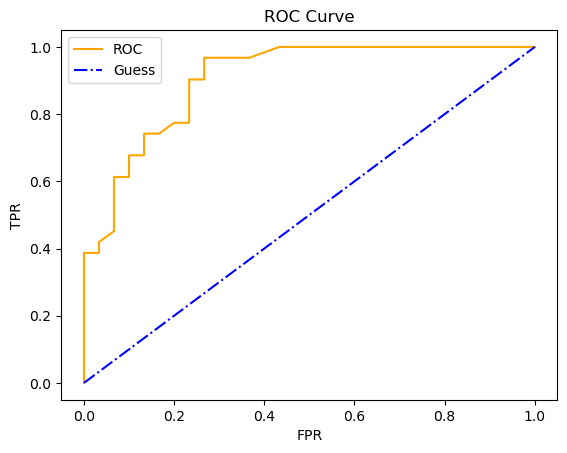

In [11]:
def plot_roc(fpr,tpr):
    """
    Plots roc curve
    """
    plt.plot(fpr,tpr, color="orange", label="ROC")
    plt.plot([0,1],[0,1], color="blue", label="Guess", ls="-." )
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve")
    plt.legend()

plot_roc(fpr,tpr)

In [13]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_prob_positive)

0.9053763440860214

### Confusion Matrix:
Its a quick way to compare the labels model was suppose to predict, and labels it predicted. In essence gives the idea where model is getting confused

In [8]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(X_test)
y_preds
confusion_matrix(Y_test,y_preds)

array([[23,  7],
       [ 3, 28]], dtype=int64)

In [9]:
# visualize the confusion matrix with pd.crosstab

pd.crosstab(Y_test,y_preds,rownames=["Actual"],colnames=["Preds"])

Preds,0,1
Actual,,
0,23,7
1,3,28


In [13]:
#execute cli command from jupyter notebook
import sys
!conda install --yes --prefix "E:\Git Repos\python-ml\env" seaborn

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



<Axes: >

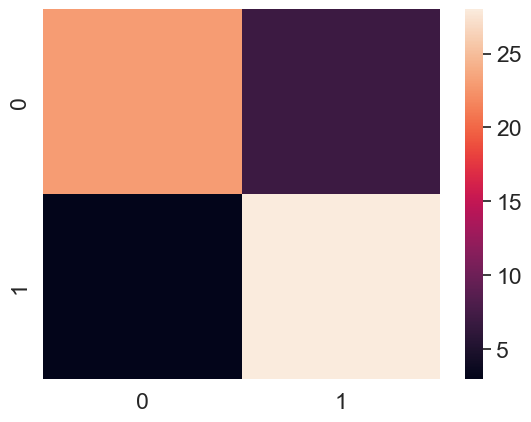

In [17]:
# Visualize usinng heatmap
import seaborn as sns
sns.set(font_scale=1.5)

conf_mat=confusion_matrix(Y_test,y_preds)
sns.heatmap(conf_mat)

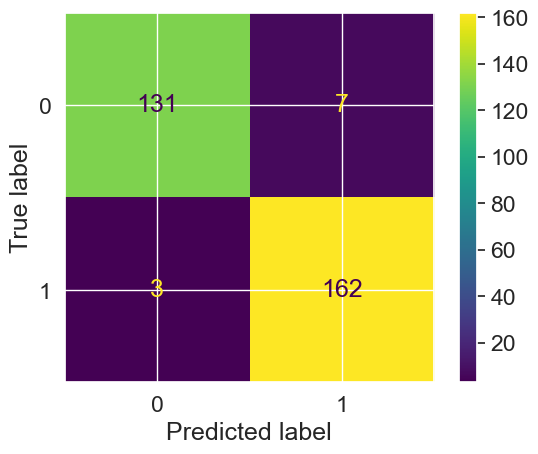

In [21]:
#Other ways of confusion matrinx in new version
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=Y) #From estimator; create predictions on its own

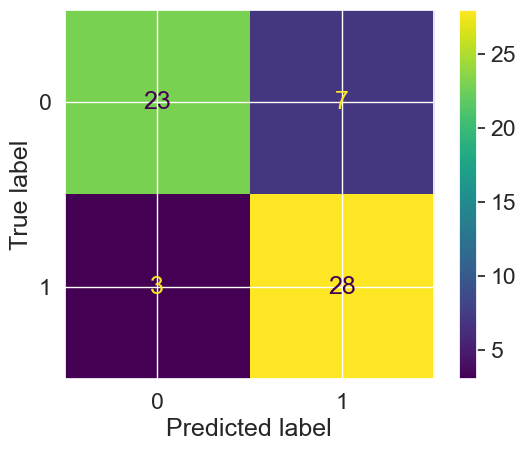

In [23]:
ConfusionMatrixDisplay.from_predictions(y_true=Y_test,y_pred=y_preds) #from_predictions; we've to make predictions seperately

In [26]:
#. Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.80      0.90      0.85        31

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



## Using the `Scoring Parameter` with `Cross Validation`

In [2]:
#. Cross val for Classification problems
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
heart_disease=pd.read_csv("data/heart-disease.csv")
X=heart_disease.drop("target",axis=1)
Y=heart_disease["target"]
model=RandomForestClassifier()

In [8]:
cv_acc=cross_val_score(model,X,y=Y,cv=5,scoring=None) #use RFC's defualt socring, by passing "None"
cv_acc
print(f"The cross val accuracy: {np.mean(cv_acc)*100:.2f}%")

The cross val accuracy: 80.84%


In [19]:
cv_precison=cross_val_score(model,X,y=Y,cv=5, scoring="precision")
cv_precison
f"{np.mean(cv_precison)*100:.2f}%"

'82.27%'

In [18]:
cv_recall=cross_val_score(model,X,y=Y,cv=5, scoring="recall")
cv_recall
f"{np.mean(cv_recall)*100:.2f}%"

'86.06%'

In [25]:
#. Cross validation for Regression model.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

np.random.seed(43)
X=housing_df.drop('target',axis=1)
Y=housing_df.target
model=RandomForestRegressor()

cvs_r2 = cross_val_score(model,X,Y,cv=2,scoring=None) #Usinng RFR's default scoring i.e R^2
cvs_r2

array([0.58863369, 0.61988773])

In [27]:
cvs_mse=cross_val_score(model,X,Y,scoring="neg_mean_squared_error") #Using Mean Squared Error -ve
cvs_mse

array([-0.53946882, -0.34460929, -0.37048047, -0.43052993, -0.46800366])

In [ ]:
cvs_mae=cross_val_score(model,X,Y,scoring="neg_mean_absolute_error")
cvs_mae

## Using sklearn.metrics functions

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#Create Data
X=housing_df.drop('target',axis=1)
Y=housing_df.target

#Create data split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

#Choose model
model=RandomForestRegressor()

#Fit data to Model
model.fit(X_train,Y_train)

#Make Predictions
Y_preds=model.predict(X_test)

#Evaluate model
mse=mean_squared_error(Y_test,Y_preds)
f"{mse}"

'0.25814302946773376'

## 5. Improving a Model
    
First Predications = Baseline predictions.
First Model = Baseline model.
From data prespective:
* Could we collect more data? (generally, more data, the better)
* Could we improve our data?

From Model prespective:
* Is there a better model we can use for our problem type?
* Could we improve the current model?
##### Parameter VS Hyperparameter
* Parameters = model find these patterns in data
* HyperParameters = Settings on the model we can adjust to (potentially) improve its abiliy to find patterns.
##### 3 ways to adjust hyperparameters:
1. By Hand
2. Randomly by RandomSearchCV
3. Exhaustively by GridSearchCV

In [3]:
# List the hyperparameters of our model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 5.1 Tuning HyParams by hand
We're going to go through following params; you can find many more in sklearn-documentations
1. `max_depth`
2. `max_feature`
3. `min_samples_leaf`
4. `min_samples_split`
5. `n_estimators`

In [1]:
#. Base Imports and datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

heart_disease=pd.read_csv("data/heart-disease.csv")
housing=fetch_california_housing()
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])

In [2]:
def evaluate_preds(y_test, y_preds):
    """ Performs various eval's on model's test data """
    accuracy = accuracy_score(y_test, y_preds)
    precision= precision_score(y_test, y_preds)
    recall= recall_score(y_test, y_preds)
    f1= f1_score(y_test, y_preds) 
    metrics_dict={
        "accuracy": round(accuracy,2),
        "precision": round(precision,2),
        "recall": round(recall,2),
        "f1": round(f1,2)
    }
    print(f"Accr: {accuracy*100:.2f}%")
    print(f"Presc: {precision*100:.2f}%")
    print(f"Recall: {recall*100:.2f}%")
    print(f"F1: {f1*100:.2f}%")
    
    return metrics_dict

In [3]:
np.random.seed(42)

#Shuffle data
heart_disease_shuffled=heart_disease.sample(frac=1)

#Split data in X,Y
X = heart_disease_shuffled.drop('target',axis=1)
Y = heart_disease_shuffled.target

#Split the data into train,validation,test sets
train_split = round(0.7*len(heart_disease_shuffled)) # 70% Training
validation_split = round(train_split + 0.15*len(heart_disease_shuffled)) # 15% Validation

X_train, Y_train = X[:train_split], Y[:train_split]
X_vald, Y_vald = X[train_split:validation_split], Y[train_split:validation_split]
X_test, Y_test = X[validation_split:], Y[validation_split:] # remaining 15% TestData
# len(X_train), len(X_vald), len(X_test)

clf=RandomForestClassifier() # passing nothing will set baseline values for all hyperparamet of this model

# Fitting Model
clf.fit(X_train,Y_train)

# Make Baseline Predictions
Y_preds=clf.predict(X_vald)
# Evaludate model on Baseline hyparams on validation
baseline_metrics = evaluate_preds(Y_vald,Y_preds)
baseline_metrics

Accr: 82.22%
Presc: 81.48%
Recall: 88.00%
F1: 84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [21]:
# Create,fit,predict,evaluate on new model with different hyparams
clf2= RandomForestClassifier(n_estimators=110)
clf2.fit(X_train,Y_train)
Y_preds2=clf2.predict(X_vald)
new_metrics = evaluate_preds(Y_vald,Y_preds2)
new_metrics

Accr: 93.33%
Presc: 92.31%
Recall: 96.00%
F1: 94.12%


{'accuracy': 0.93, 'precision': 0.92, 'recall': 0.96, 'f1': 0.94}

#### 5.2 Tuning Hyperparameter with RandomizeSearchCV

In [9]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators":[10,15,20,50,100,200],
        "max_features":["auto","sqrt"],
        "max_depth":[None,2,3,5,8,13],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]}
np.random.seed(42)
#. Split in X,Y
X=heart_disease_shuffled.drop('target',axis=1)
Y=heart_disease_shuffled.target
#. Split Train-test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
#. Instantiate Model
model = RandomForestClassifier(n_jobs=1)
#. Setup RandomizedSearch CV
rs_model = RandomizedSearchCV(estimator=model,
                              param_distributions=grid,
                              n_iter=10, #iterations or trials
                              cv=5, #with 5 different data splits
                              verbose=2)
#. Fit data to RS_CV
rs_model.fit(X_train,Y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   

E:\Git Repos\python-ml\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Git Repos\python-ml\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Git Repos\python-ml\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "E:\Git Repos\python-ml\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "E:\Git Repos\python-ml\env\Lib\site

In [10]:
rs_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 2}

In [13]:
#Make predictions using best params
rs_y_preds=rs_model.predict(X_test)
# Evaludate model
rs_metrics = evaluate_preds(Y_test,rs_y_preds)

Accr: 85.25%
Presc: 77.14%
Recall: 96.43%
F1: 85.71%


#### 5.3 Tuning using GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV
grid2 = {"n_estimators":[100,200,250],
        "max_features":["sqrt"],
        "max_depth":[None,2,3],
        "min_samples_split":[4,6],
        "min_samples_leaf":[2,4]}
np.random.seed(42)
#. Split in X,Y
X=heart_disease_shuffled.drop('target',axis=1)
Y=heart_disease_shuffled.target
#. Split Train-test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
#. Instantiate Model
model = RandomForestClassifier(n_jobs=1)
#. Setup GridSearch CV
gs_model = GridSearchCV(estimator=model,
                        param_grid=grid2,
                        cv=5, #with 5 different data splits
                        verbose=2)
#. Fit data to GS_CV
gs_model.fit(X_train,Y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4,

In [25]:
gs_model.best_params_

{'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 250}

In [17]:
gs_model.best_score_

0.8553571428571429

In [20]:
gs_y_preds=gs_model.predict(X_test)
gs_metrics=evaluate_preds(Y_test,gs_y_preds)

Accr: 83.61%
Presc: 76.47%
Recall: 92.86%
F1: 83.87%


<Axes: >

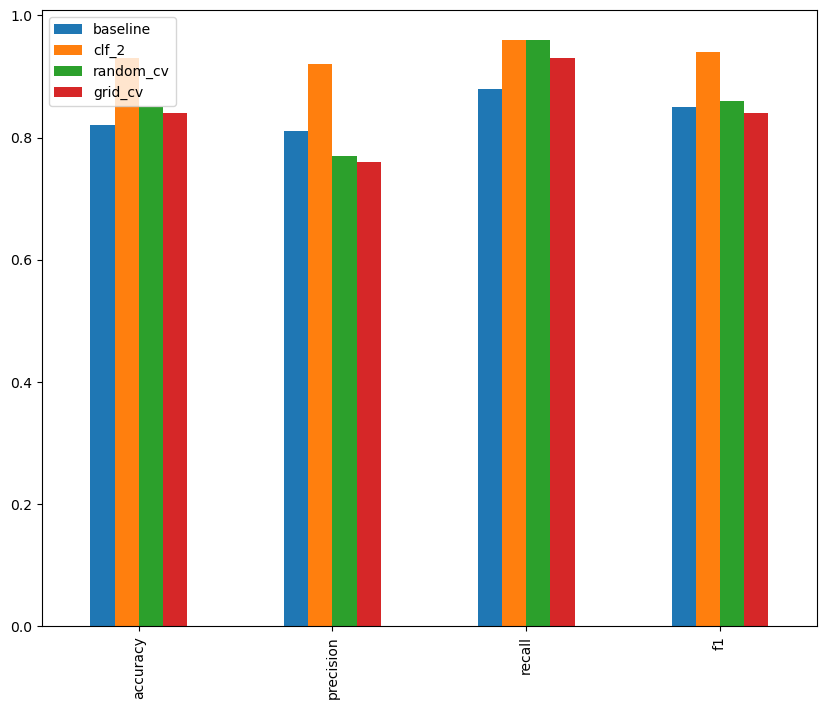

In [22]:
# Comparing the model performance with variouos parametes
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                                "clf_2":new_metrics,
                               "random_cv":rs_metrics,
                               "grid_cv":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))

## 6. Saving and Loading the Models
We we'll use following libs:
1. Pythons `pickle`
2. `joblib`

### 6.1 With Pickle

In [28]:
import pickle
pickle.dump(gs_model,open("models/GS_Classifier.pkl",'wb'))
load_mod=pickle.load(open("models/GS_Classifier.pkl",'rb'))

In [29]:
load_preds=load_mod.predict(X_test)
evaluate_preds(Y_test,load_preds)

Accr: 83.61%
Presc: 76.47%
Recall: 92.86%
F1: 83.87%


{'accuracy': 0.84, 'precision': 0.76, 'recall': 0.93, 'f1': 0.84}

### 6.2 With joblib

In [31]:
from joblib import dump,load
dump(gs_model,filename="models/GS_Classifier.joblib")
jlb_model=load(filename="models/GS_Classifier.joblib")
jlb_preds=jlb_model.predict(X_test)
evaluate_preds(Y_test,jlb_preds)

Accr: 83.61%
Presc: 76.47%
Recall: 92.86%
F1: 83.87%


{'accuracy': 0.84, 'precision': 0.76, 'recall': 0.93, 'f1': 0.84}